# Project Description


This project aims to detect intrusions in a network intrusion detection system using machine learning models in the anomaly module. The dataset will undergo data profiling and exploratory analysis, followed by scaling of numerical attributes and encoding of categorical columns. Feature selection will be performed to select the most important features. The dataset will be partitioned into training and testing sets, and several machine learning models will be fitted, evaluated and compared. The best performing model will be chosen and saved using the pickle library to be used for future predictions. The predicted results will be visualized using various plots and charts.

The final machine learning model will be used in the anomaly detection module of the network intrusion detection system to detect intrusions that are not found in the signature-based detection system.

In [ ]:
# Karam Issa ;)

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# About Dataset:

The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes.

For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features) .The class variable has two categories:

• Normal

• Anomalous

In [2]:

from google.colab import files
# Load the Data locally 'Train_data.csv'
uploaded = files.upload()
# Load the Data locally 'Test_data.csv'
uploaded = files.upload()

Saving Train_data.csv to Train_data.csv


Saving Test_data.csv to Test_data.csv


# Data Profiling And Exploratory Analysis

In [3]:
dfTrain = pd.read_csv('Train_data.csv')
dfTrain.shape
#The data set contains 25,192 rows representing each connection recorded
# the data set contains 42 columns

(25192, 42)

In [4]:
dfTest = pd.read_csv('Test_data.csv')
dfTest.shape

(22544, 41)

In [5]:
# Descriptive Statistics
print("Train Data Set Descripting\n\n")
dfTrain.describe()

Train Data Set Descripting




,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print("Test data set Description\n\n")
dfTest.describe()

Test data set Description




,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print("Sample data (first 5 rows) from the train data set\n")
dfTrain.head(5)

Sample data (first 5 rows) from the train data set



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
print("Sample data (first 5 rows) from the test data set\n")
dfTest.head(5)

Sample data (first 5 rows) from the test data set



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [9]:
# Count the number of empty values (Nan, NAN na) values in each column in Train Data set
dfTrain.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
# Count the number of empty values (Nan, NAN na) values in each column in Test Data set
dfTest.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
# Attack Class Distribution
dfTrain['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

# Data Balance

In the context of a dataset, the imbalance ratio is a measure of the class imbalance, which refers to the unequal distribution of samples across different classes. It helps quantify the degree of imbalance in the dataset.

Imbalance Ratio = (Number of samples in the majority class) / (Number of samples in the minority class)

the closer the ratio to 1 the better the balance

In [13]:
#Imbalance Ratio

print("The imbalance ratio is : 13449/11743 = ", 13449/11743)

The imbalance ratio is : 13449/11743 =  1.1452780379800733


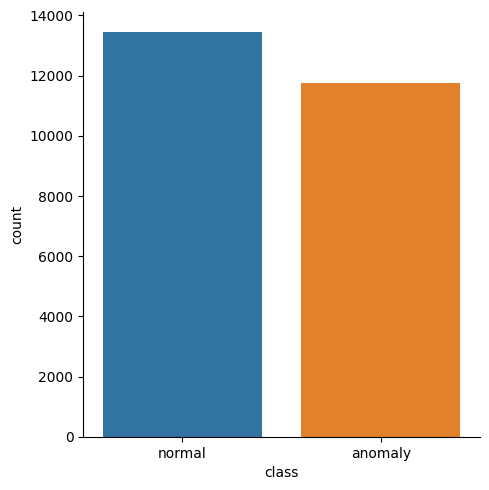

In [14]:
# Visualise the count(data balance)
sns.catplot(x='class', kind='count', data=dfTrain)

# Scaling Numerical Attributes

using the Scikit-learn library to preprocess the numerical attributes of the training datasets by scaling them to have zero mean and unit variance. This type of scaling is known as "standardization" or "z-score normalization" and is a common preprocessing step in machine learning workflows.

In [15]:
dfTrain.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [16]:
from sklearn.preprocessing import StandardScaler
# 'StandardScaler' is a preprocessing class that scales the input data to have zero mean and unit variance.
scaler = StandardScaler()

In [17]:
#The select_dtypes() method is used to select only the columns of the DataFrame that have a numerical data type, as specified by the include parameter. 

cols = dfTrain.select_dtypes(include=['float64', 'int64']).columns
# The resulting cols variable contains the names of the numerical columns

# fit_transform() method fits the scaler to the training data and then transforms both the training and testing data using the same scaling factors.
standardScalarTrain = scaler.fit_transform(dfTrain.select_dtypes(include=['float64','int64'])) 
standardScalarTest = scaler.fit_transform(dfTest.select_dtypes(include=['float64','int64'])) 

#pd.DataFrame() constructor is used to create new DataFrames from the scaled arrays. 
#The resulting DataFrames have the same column names as the original datasets, and the scaled values are stored in the corresponding columns.
sc_train_df = pd.DataFrame(standardScalarTrain, columns= cols)
sc_test_df = pd.DataFrame(standardScalarTest, columns= cols)



In [18]:
sc_train_df.dtypes

duration                       float64
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate            

In [19]:
sc_train_df.shape
# 38 columns contain numerical data

(25192, 38)

# Encoding Categorical Attributes/Columns

In [20]:
from sklearn.preprocessing import LabelEncoder
# The LabelEncoder class from scikit-learn is imported and an instance of the class is created.
# This object will be used to transform the categorical attributes in the data set into numerical format.
encoder =  LabelEncoder()

# Extract the categorical attributes from the training set
catTrain = dfTrain.select_dtypes(include=['object']).copy()

# Extract the categorical attributes from the testing set
catTest = dfTest.select_dtypes(include=['object']).copy()

# Encode the categorical attributres in the training set
encodedCatTrain = catTrain.apply(encoder.fit_transform)

# Encode the categorical attributres in the testing set
encodedCatTest = catTest.apply(encoder.fit_transform)
# The apply method is used to apply the fit_transform method of the LabelEncoder object to each column of the selected categorical attributes in the training set.



# Seperate the target column from the ecoded training set
#encodedCatTrain = encodedCatTrain.drop(['class'],axis=1)
encodedCatTrain.dtypes

protocol_type    int64
service          int64
flag             int64
class            int64
dtype: object

In [21]:
train_x=pd.concat([sc_train_df, encodedCatTrain], axis=1)
train_y = dfTrain['class']
train_x.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,class
0,-0.113551,-0.009889,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,1,19,9,1
1,-0.113551,-0.010032,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,2,41,9,1
2,-0.113551,-0.010093,-0.03931,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1,46,5,0


In [22]:
final_test_df = pd.concat([sc_test_df, encodedCatTest], axis=1)
final_test_df.shape

(22544, 41)

In [23]:
#Print the first rows of the new data framet
train_x.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,class
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,1,19,9,1
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,2,41,9,1
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1,46,5,0
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,1,22,9,1
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,1,22,9,1


In [24]:
#Show the correlation of the columns
train_x.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,class
duration,1.000000,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,...,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435,0.036421,0.101301,-0.066634,-0.050901
src_bytes,0.084864,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,...,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190,-0.001286,0.008554,-0.006599,-0.005743
dst_bytes,0.013258,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,...,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803,-0.004734,-0.013782,0.027606,0.010949
land,-0.001012,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,...,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335,-0.001123,-0.006896,-0.006593,-0.000605
wrong_fragment,-0.010358,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,...,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143,0.176420,0.088169,0.068693,-0.097625
urgent,-0.000486,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,...,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358,-0.000794,0.011325,0.004744,-0.006743
hot,0.004202,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,0.004893,0.113115,0.002005,...,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719,-0.011589,-0.056165,0.067027,0.012839
num_failed_logins,0.011108,-0.000260,0.005197,-0.000234,-0.002392,-0.000165,0.004893,1.000000,-0.006872,0.015787,...,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693,-0.003305,0.029601,-0.010920,-0.000028
logged_in,-0.063703,-0.002040,0.012704,-0.007196,-0.073674,0.007801,0.113115,-0.006872,1.000000,0.027083,...,-0.159278,-0.057390,-0.490450,-0.492446,-0.274430,-0.270507,-0.101810,-0.138824,0.587882,0.688084
num_compromised,0.095215,-0.000196,0.035852,-0.000195,-0.001995,0.002886,0.002005,0.015787,0.027083,1.000000,...,-0.004146,0.013608,-0.007911,-0.007716,-0.007199,-0.004361,-0.002757,0.037699,0.011328,0.018620


<Axes: >

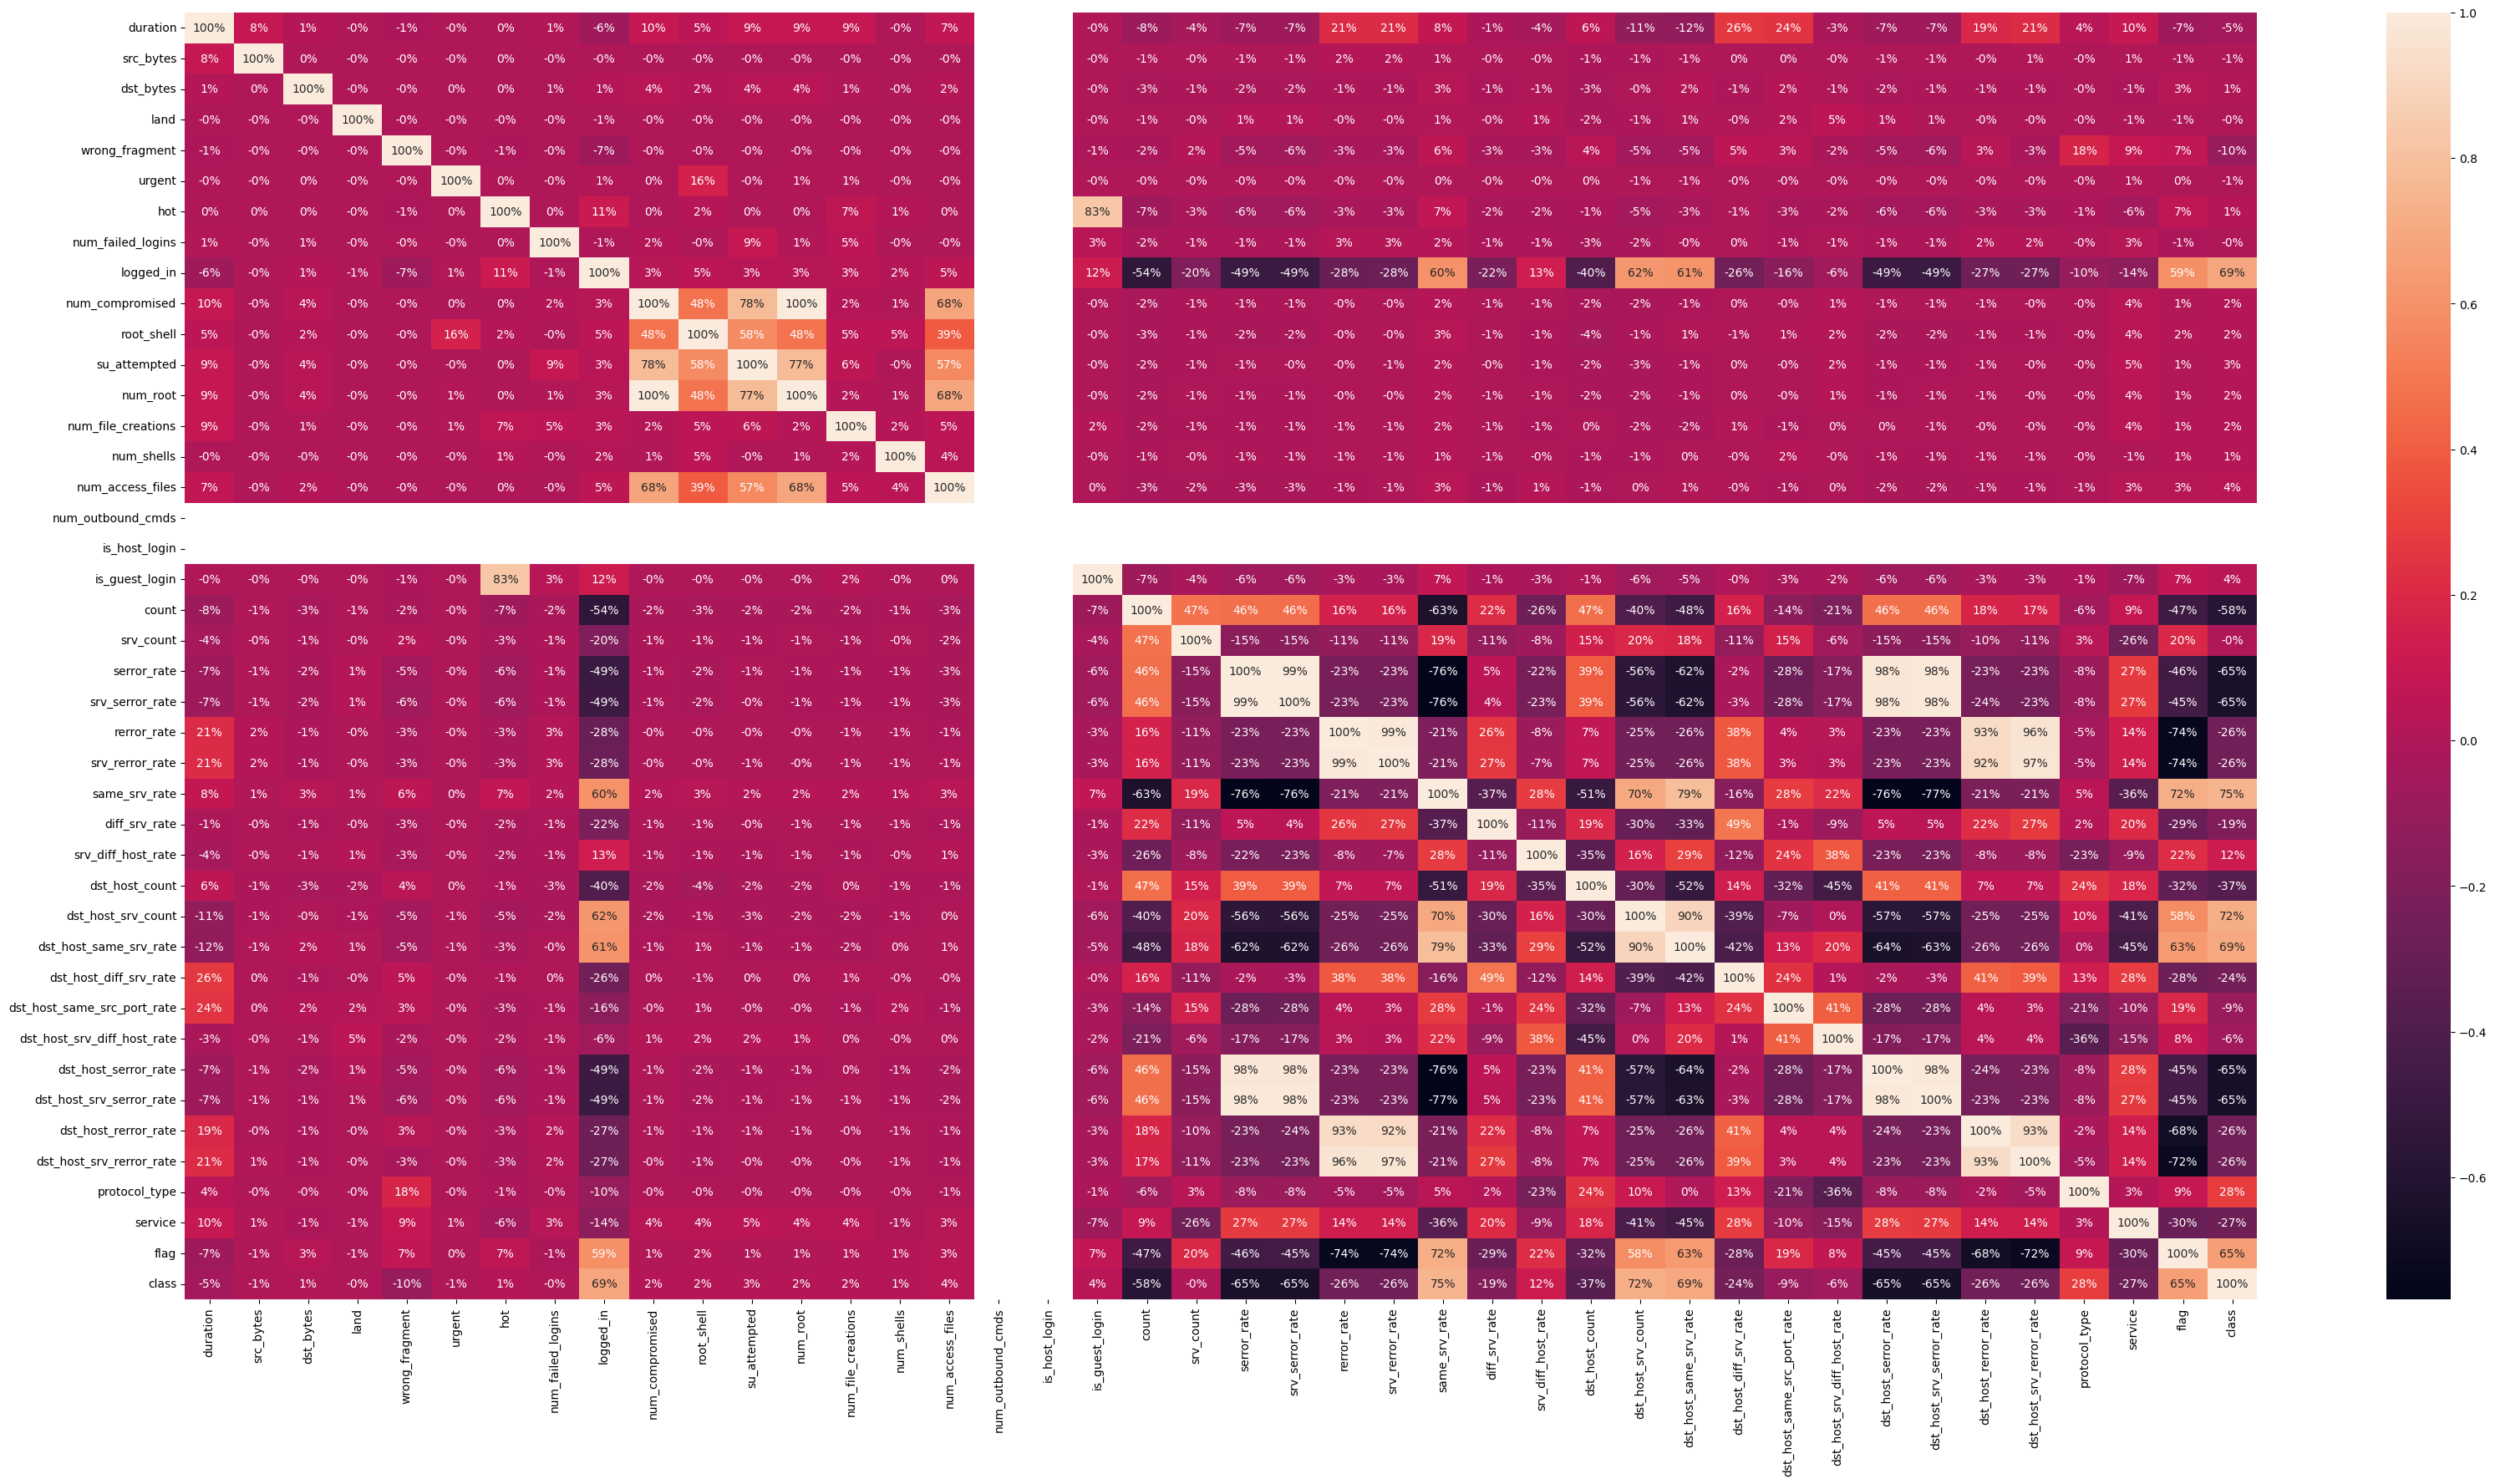

In [25]:
# Visualize teh correlation among features
plt.figure(figsize=(40,20))
sns.heatmap(train_x.corr(), annot=True, fmt='.0%')

In [26]:
train_x['num_outbound_cmds'].value_counts()

0.0    25192
Name: num_outbound_cmds, dtype: int64

In [27]:
train_x['is_host_login'].value_counts()


0.0    25192
Name: is_host_login, dtype: int64

In [28]:
# as both 'num_outboud_cmds' and 'is_host_login' have all 0 values this makes them redundant columns and must be removed from both train adn test datasets
train_x.drop(['num_outbound_cmds', 'is_host_login'], axis=1, inplace=True)
final_test_df.drop(['num_outbound_cmds', 'is_host_login'], axis=1, inplace=True)


In [29]:
train_x.shape

(25192, 40)

In [30]:
final_test_df.shape

(22544, 39)

<Axes: >

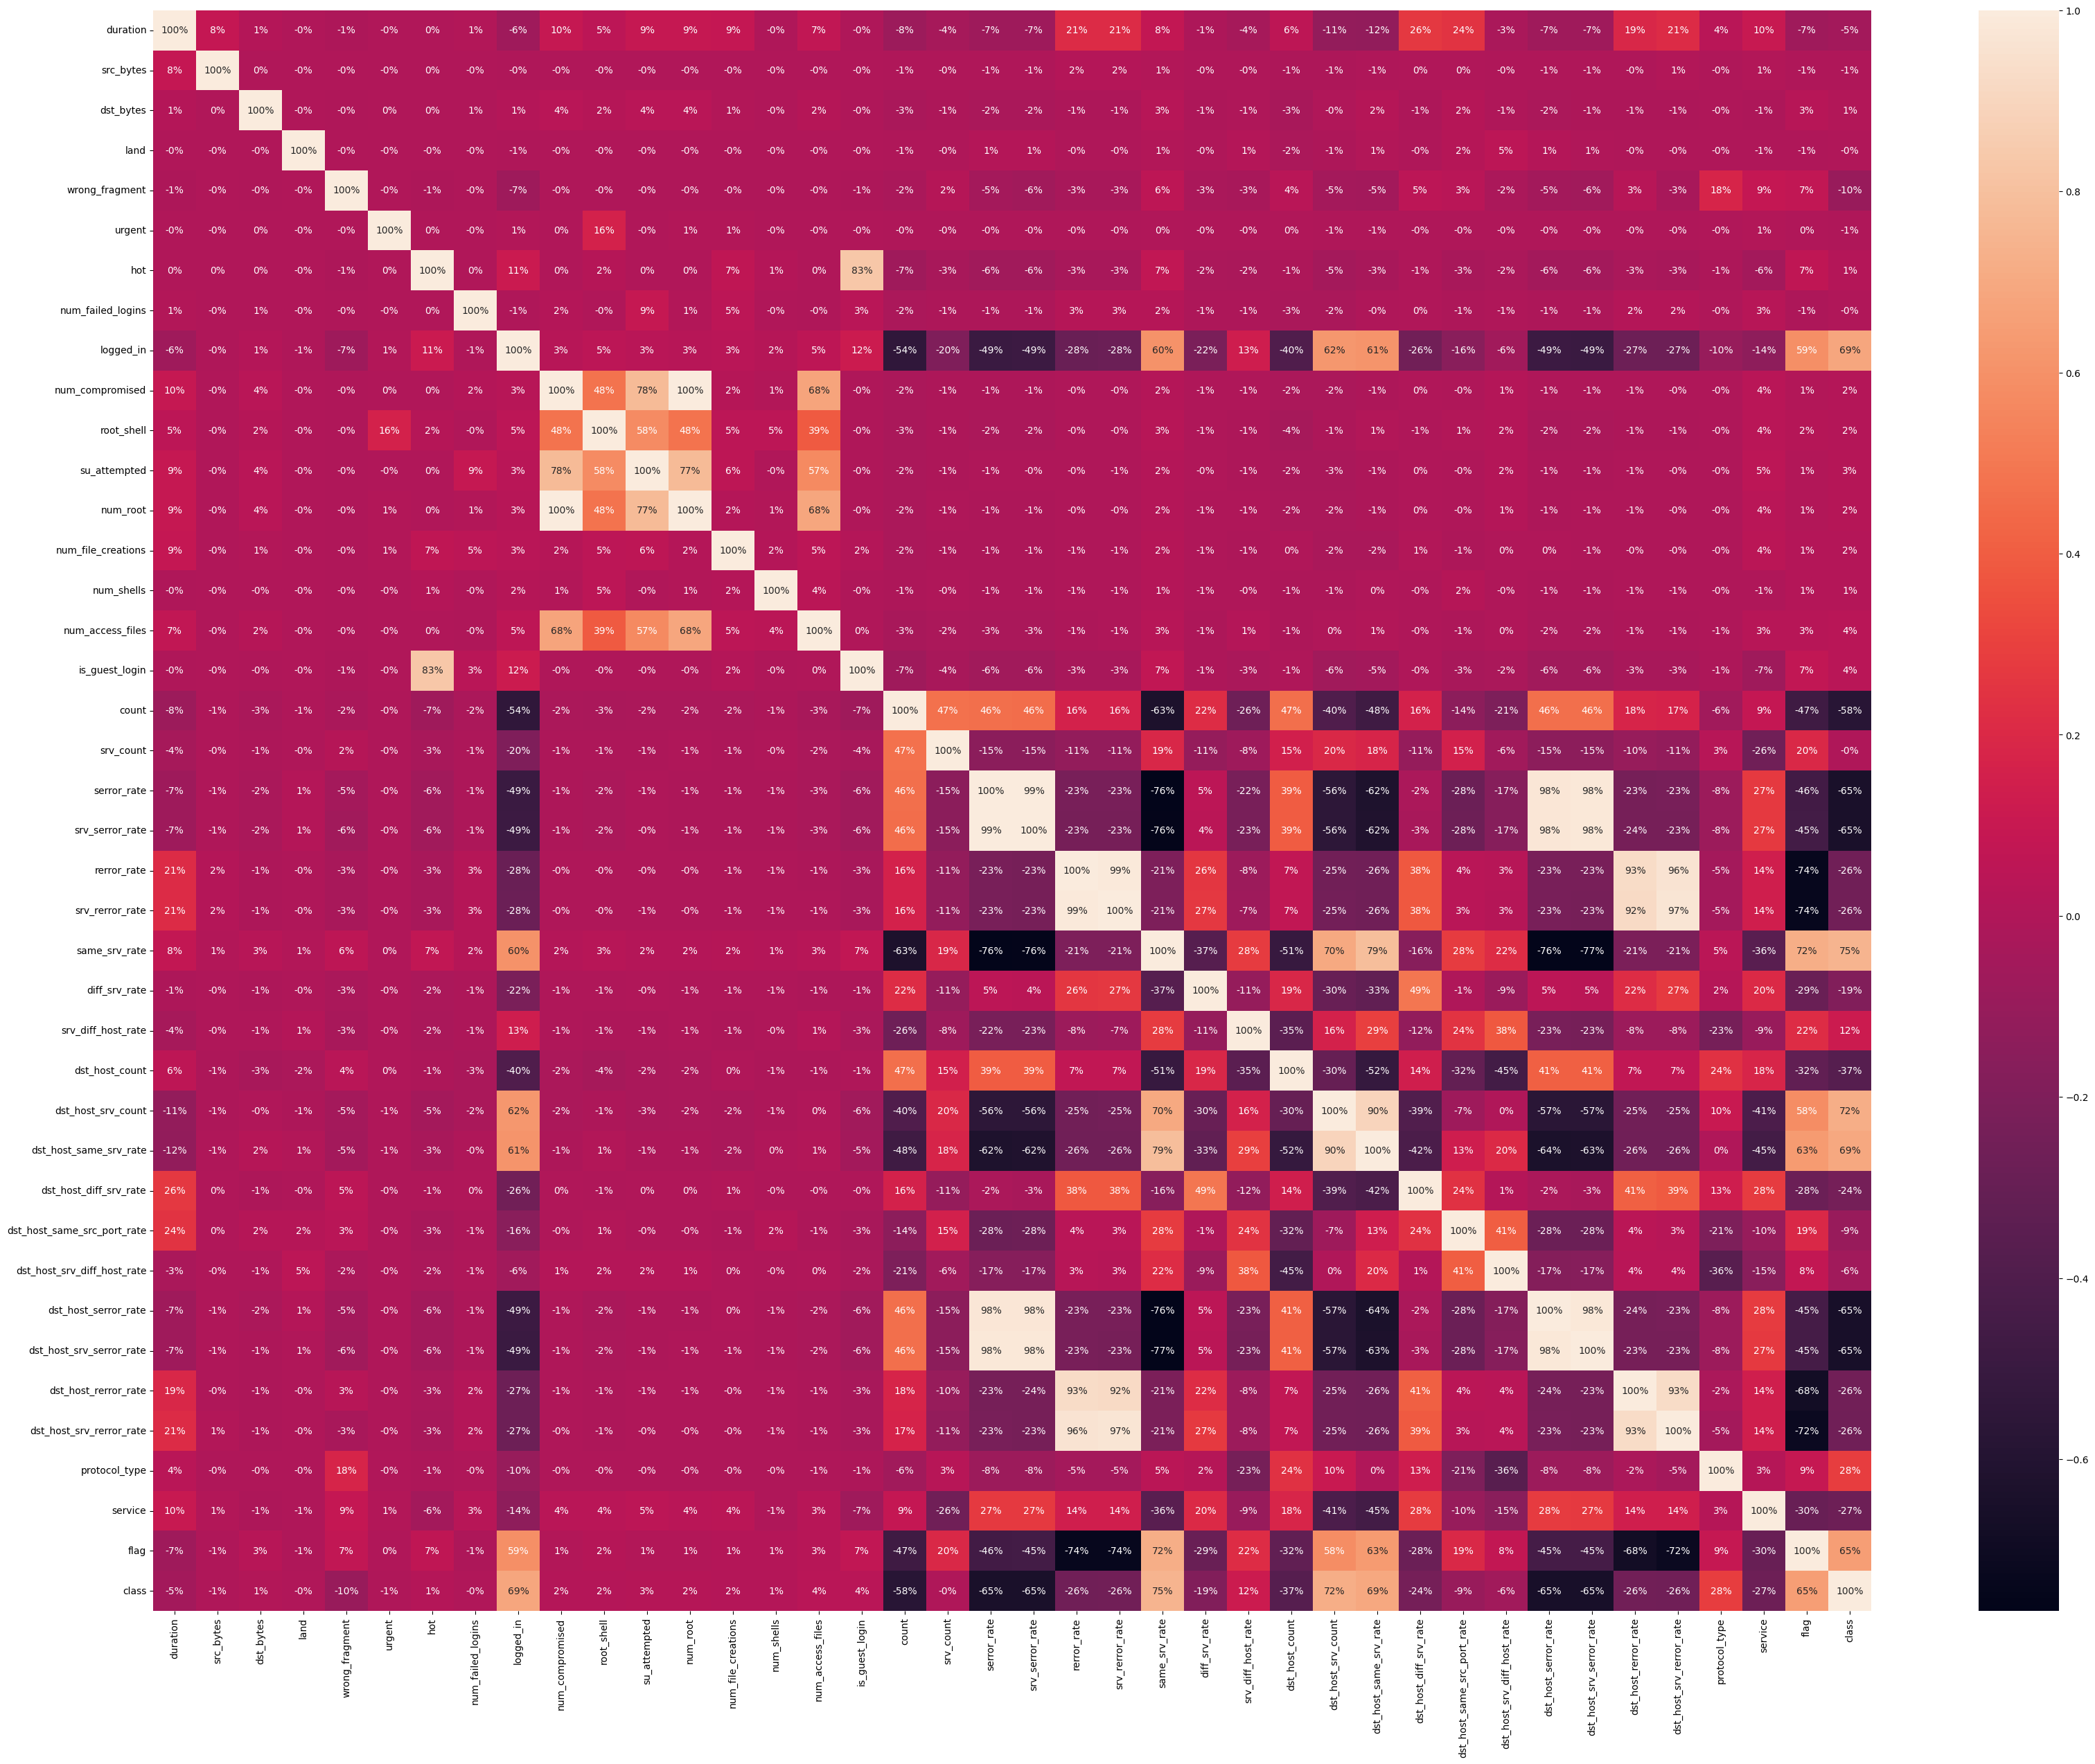

In [31]:
plt.figure(figsize=(40,30))
sns.heatmap(train_x.corr(), annot=True, fmt='.0%')

# Feature Selection


Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. The purpose of feature selection is to reduce the number of input variables to those that are most useful in predicting the target variable.


1-Reducing overfitting: Including too many irrelevant or redundant features in a model can lead to overfitting, which occurs when a model is too complex and fits the training data too closely, resulting in poor performance on new data.

2-Improving model performance: By selecting the most important features, we can improve the performance of a model by reducing noise and focusing on the most relevant information.

3-Reducing training time: Fewer features means less data to process, leading to faster training times for machine learning models.

4-Improving interpretability: A model with fewer features is often easier to interpret and understand, making it easier to communicate insights and findings to stakeholders.


After creating the heatmap and visualizing the correlations between the features, you can choose to remove highly correlated features. A common threshold is to remove features with a correlation coefficient above 0.7 or below -0.7. 

In [32]:
# Create a correlation matrix (abs to remove negatives)
corr_matrix = train_x.corr().abs()

# Select upper triangle of correlation matrix

# corr_matrix is a square matrix that contains the correlation coefficients between all pairs of features in a dataset.
# The where() method of a pandas DataFrame is used to select elements of the matrix that meet a certain condition.
# The np.triu() method creates an upper triangular matrix of ones with the same shape as corr_matrix
#  The k=1 argument specifies that the diagonal should be excluded. The resulting matrix is then cast to a boolean matrix with astype(np.bool).
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


#The resulting upper variable is a DataFrame with the same shape as corr_matrix,
# but with all values in the lower triangle set to NaN. This makes it easy to identify
# highly correlated features by looking for pairs of features with correlation coefficients above a certain threshold.


upper.head(5)

<ipython-input-32-869398e9f1e1>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,class
duration,NaN,0.084864,0.013258,0.001012,0.010358,0.000486,0.004202,0.011108,0.063703,0.095215,...,0.240970,0.025485,0.066513,0.066240,0.187070,0.208435,0.036421,0.101301,0.066634,0.050901
src_bytes,NaN,NaN,0.003611,0.000090,0.000916,0.000062,0.000995,0.000260,0.002040,0.000196,...,0.002316,0.001238,0.006346,0.006227,0.002130,0.006190,0.001286,0.008554,0.006599,0.005743
dst_bytes,NaN,NaN,NaN,0.000350,0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,...,0.024078,0.006006,0.015584,0.014543,0.014094,0.012803,0.004734,0.013782,0.027606,0.010949
land,NaN,NaN,NaN,NaN,0.000813,0.000056,0.000819,0.000234,0.007196,0.000195,...,0.024635,0.053037,0.014291,0.005596,0.003432,0.003335,0.001123,0.006896,0.006593,0.000605
wrong_fragment,NaN,NaN,NaN,NaN,NaN,0.000575,0.008386,0.002392,0.073674,0.001995,...,0.034670,0.020174,0.053786,0.057230,0.027718,0.034143,0.176420,0.088169,0.068693,0.097625


The resulting matrix contains True values in the upper triangle and False values in the lower triangle. By using where() with this matrix as a filter, all elements in the lower triangle are set to NaN values, effectively selecting only the upper triangle.

The resulting upper variable is a DataFrame with the same shape as corr_matrix, but with all values in the lower triangle set to NaN. This makes it easy to identify highly correlated features by looking for pairs of features with correlation coefficients above a certain threshold.

In [33]:
# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print("# of Columns to drop: ", len(to_drop))
to_drop

# of Columns to drop:  14


['su_attempted',
 'num_root',
 'is_guest_login',
 'srv_serror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'flag',
 'class']

In [34]:
print("Train data set Information Before Drop:")
print(train_x.columns)  # print current column labels
print(train_x.shape)

# Drop the highly correlated features from the dataframe
train_x = train_x.drop(to_drop, axis=1)

print("Train data set Information After Drop:")
print(train_x.columns)  # print current column labels
print(train_x.shape)

Train data set Information Before Drop:
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type',
       'service', 'flag', 'class'],
      dtype='object')
(25192, 40)
Train data set Information After Drop:
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_fai

# DataSet Partition
The purpose of this is to have a subset of the data to train the model and another subset to test the performance of the trained model.

The training set is used to fit the model parameters, while the testing set is used to evaluate the model's performance on unseen data. By evaluating the model on the testing set, we can get an estimate of how well the model will generalize to new, unseen data.

If we do not partition the data and instead train the model on the entire dataset, we risk overfitting, which is when the model is too complex and captures noise in the data, resulting in poor performance on new data. Therefore, it is important to partition the data into training and testing sets to evaluate the model's ability to generalize to new data.

The train_test_split() function from Scikit-learn is a convenient way to randomly partition the data into training and testing sets.

In [35]:
#Split the data set into independent (X)  and depended (Y) data sets
# x is train_x, y is train_y

train_x

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,serror_rate,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type,service
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.640142,-0.372186,-0.349282,-0.373886,-0.328634,-0.280673,0.073120,-0.287993,1,19
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.640142,-0.372186,0.490836,-0.373886,0.732059,2.764403,2.375620,-0.287993,2,41
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,1.595477,-0.372186,0.042773,-0.373886,0.732059,-0.173828,-0.478183,-0.287993,1,46
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.193018,-0.372186,-0.349282,-0.373886,-1.540854,-0.440940,-0.380894,0.073759,1,22
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.640142,-0.372186,-0.349282,-0.023115,0.732059,-0.440940,-0.478183,-0.287993,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.640142,2.765176,0.042773,-0.373886,0.732059,-0.120406,-0.478183,-0.287993,1,16
25188,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.640142,-0.372186,-0.349282,-0.373886,-1.833807,-0.440940,2.764775,1.339894,1,19
25189,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.640142,2.765176,0.042773,-0.373886,0.732059,-0.066984,-0.478183,-0.287993,1,46
25190,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,1.595477,-0.372186,-0.013235,-0.373886,0.732059,-0.120406,-0.478183,-0.287993,1,38


In [36]:
train_y

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
25187    anomaly
25188    anomaly
25189    anomaly
25190    anomaly
25191    anomaly
Name: class, Length: 25192, dtype: object

In [37]:
#Split teh data set into 56% training and 44% testing
from sklearn.model_selection import  train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size = 0.44, random_state = 0)

# Fitting Models

The purpose of fitting models is to use an algorithm to learn patterns in the data and make predictions or estimates about new data. By training a model on a set of labeled data (known as the training set), the model learns to identify relationships between the input features and the target variable. Once the model has learned these relationships, it can be used to make predictions on new data. The goal is to develop a model that can accurately predict the target variable for new data that it has not seen before

In [38]:
# create a function for the Models:
def machineLearningModels(X_train, Y_train):


  # The random_state parameter is set to 0 to ensure that the results are reproducible. 
  # This parameter sets the random seed used by the algorithm to initialize the internal random number generator,
  # so that the results are consistent across different runs.

  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  logRegression = LogisticRegression(random_state=0)
  logRegression.fit(X_train, Y_train)


  # Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  # to measure the quality of a split -> 'entropy',  measures the degree of impurity or randomness in the data.
  # it tends to create more balanced trees, as it penalizes larger splits more than Gini impurity.
  decisionTree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  decisionTree.fit(X_train, Y_train)


  # Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  # n_estimators: the number of decision trees in the random forest.
  randomforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
  randomforest.fit(X_train, Y_train)

  # KNeighbors Classifier
  from sklearn.neighbors import KNeighborsClassifier
  #the n_jobs parameter specifies the number of CPU cores to use for parallel processing during model training.
  # A value of -1 for n_jobs means that all available CPU cores will be used.
  KNNClassifier = KNeighborsClassifier(n_jobs=-1)
  KNNClassifier.fit(X_train, Y_train); 


  # Gaussian Naive Baye Model
  from sklearn.naive_bayes import BernoulliNB
  GNBClassifier = BernoulliNB()
  GNBClassifier.fit(X_train, Y_train)





  #print the model accuracy on teh training data
  print('[0]Logistic Regression Training Accuracy:', logRegression.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', decisionTree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Training Accuracy:', randomforest.score(X_train, Y_train))
  print('[3]KNeighbors Classifier Training Accuracy:', KNNClassifier.score(X_train, Y_train))
  print('[4]Gaussian Naive Baye Model Training Accuracy:', GNBClassifier.score(X_train, Y_train))

  return logRegression, decisionTree, randomforest, KNNClassifier, GNBClassifier



# Machine Learning Models Brief Explination:

**1-Logistic Regression:**

Logistic Regression is a statistical model that is used to predict binary outcomes based on a set of independent variables. It models the probability of an event occurring by fitting data to a logistic curve, which can be used to make binary predictions. The algorithm works by minimizing the error between predicted probabilities and actual outcomes.

**2-Decision Tree:**

A decision tree is a flowchart-like model that is used to make decisions based on multiple criteria. In the context of machine learning, decision trees are used as classification models to predict the class of a given input. It works by recursively partitioning the input space into regions based on the feature values, until a stopping criterion is met. Each partition is represented by a node in the tree, and the final output is the class assigned to the leaf node that corresponds to the input.

**4-Random Forest Classifier:**

A random forest classifier is a type of ensemble learning algorithm that uses multiple decision trees to make predictions. It works by creating a set of decision trees, where each tree is trained on a random subset of the data and a random subset of the features. The final prediction is then made by aggregating the predictions of all the trees.


**5-Gaussian Naive Bayes Model:**

The Gaussian Naive Bayes model is a probabilistic classification algorithm that is based on Bayes' theorem. It assumes that the features are independent and normally distributed, and uses this assumption to calculate the probability of a given input belonging to a particular class. The algorithm works by calculating the likelihood of each feature value given the class, and then multiplying those probabilities together to get the likelihood of the entire input. The final output is the class with the highest likelihood.

In [39]:
# Getting all the models
models = machineLearningModels(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0]Logistic Regression Training Accuracy: 0.9536400368611327
[1]Decision Tree Classifier Training Accuracy: 0.9999291132062097
[2]Random Forest Classifier Training Accuracy: 0.9997164528248388
[3]KNeighbors Classifier Training Accuracy: 0.9916353583327426
[4]Gaussian Naive Baye Model Training Accuracy: 0.8685049975189623


**The confusion matrix is a table used to evaluate the performance of a classification model by showing the number of correct and incorrect predictions made by the model.**

In a binary classification problem, the confusion matrix has 2 rows and 2 columns. The columns represent the predicted classes (positive and negative), while the rows represent the actual classes.

The four possible outcomes in a binary classification problem are:

True Positive (TP): The model correctly predicted the positive class.
False Positive (FP): The model predicted the positive class, but the actual class was negative.
True Negative (TN): The model correctly predicted the negative class.
False Negative (FN): The model predicted the negative class, but the actual class was positive.
True Positive and True Negative are considered the correct predictions, while False Positive and False Negative are the incorrect predictions.

The testing accuracy is calculated as (truePositive + trueNegative)/ (truePositive + trueNegative + falseNegative + falsePositive). It represents the proportion of correct predictions out of the total number of predictions made by the model on the test set.

In [40]:
# Importing the necessary libraries
modelNames = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'KNeighbors Classifier', 'Gaussian Naive Baye Model']
from sklearn.metrics import confusion_matrix

# Looping through each model
for i in range(len(models)):
  
  # Printing the model number
  print('Model [', i,'] ', modelNames[i] )
  
  # Creating the confusion matrix on the training data
  cm = confusion_matrix(Y_train, models[i].predict(X_train))
  
  # Extracting values from the confusion matrix
  truePositive = cm[0][0]
  trueNegative = cm[1][1]
  falseNegative = cm[1][0]
  falsePositive = cm[0][1]
  
  # Printing the confusion matrix
  print(cm)
  
  # Calculating the testing accuracy and printing it
  print('testing Accuracy = ', (truePositive + trueNegative)/ (truePositive + trueNegative + falseNegative + falsePositive ))
  
  # Adding a blank line for better readability
  print()

Model [ 0 ]  Logistic Regression
[[6193  399]
 [ 255 7260]]
testing Accuracy =  0.9536400368611327

Model [ 1 ]  Decision Tree Classifier
[[6592    0]
 [   1 7514]]
testing Accuracy =  0.9999291132062097

Model [ 2 ]  Random Forest Classifier
[[6590    2]
 [   2 7513]]
testing Accuracy =  0.9997164528248388

Model [ 3 ]  KNeighbors Classifier
[[6525   67]
 [  51 7464]]
testing Accuracy =  0.9916353583327426

Model [ 4 ]  Gaussian Naive Baye Model
[[5814  778]
 [1077 6438]]
testing Accuracy =  0.8685049975189623



In [41]:
# Import necessary libraries
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Iterate through all trained models and print their classification report and accuracy score on the training data
for i in range(len(models)):
  print('Model [', i,'] ', modelNames[i] )
  
  # Print the classification report for the model on the training data
  print( classification_report(Y_train, models[i].predict(X_train)))
  
  # Print the accuracy score of the model on the training data
  print( accuracy_score(Y_train, models[i].predict(X_train)))
  
  # Add an empty line for clarity in output
  print()

Model [ 0 ]  Logistic Regression
              precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      6592
      normal       0.95      0.97      0.96      7515

    accuracy                           0.95     14107
   macro avg       0.95      0.95      0.95     14107
weighted avg       0.95      0.95      0.95     14107

0.9536400368611327

Model [ 1 ]  Decision Tree Classifier
              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      6592
      normal       1.00      1.00      1.00      7515

    accuracy                           1.00     14107
   macro avg       1.00      1.00      1.00     14107
weighted avg       1.00      1.00      1.00     14107

0.9999291132062097

Model [ 2 ]  Random Forest Classifier
              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      6592
      normal       1.00      1.00      1.00      7515

    accuracy                     

# Evaluate Models

The purpose of evaluating the machine learning model on test data is to assess the performance of the model on unseen data. This is important to determine the generalization capability of the model and to ensure that it has not overfit to the training data. By evaluating the model on a separate test set, we can estimate how well the model will perform in the real world. 

In [42]:
# Looping through each model
for i in range(len(models)):
  
  # Printing the model number
  print('Model [', i,'] ', modelNames[i] )
  
  # Creating the confusion matrix on the test data
  cm = confusion_matrix(Y_test, models[i].predict(X_test))
  
  # Extracting values from the confusion matrix
  truePositive = cm[0][0]
  trueNegative = cm[1][1]
  falseNegative = cm[1][0]
  falsePositive = cm[0][1]
  
  # Printing the confusion matrix
  print(cm)
  
  # Calculating the testing accuracy and printing it
  print('testing Accuracy = ', (truePositive + trueNegative)/ (truePositive + trueNegative + falseNegative + falsePositive ))
  
  # Adding a blank line for better readability
  print()

Model [ 0 ]  Logistic Regression
[[4828  323]
 [ 207 5727]]
testing Accuracy =  0.9521876409562472

Model [ 1 ]  Decision Tree Classifier
[[5124   27]
 [  20 5914]]
testing Accuracy =  0.9957600360847992

Model [ 2 ]  Random Forest Classifier
[[5124   27]
 [  14 5920]]
testing Accuracy =  0.9963013080739739

Model [ 3 ]  KNeighbors Classifier
[[5077   74]
 [  44 5890]]
testing Accuracy =  0.9893549842129004

Model [ 4 ]  Gaussian Naive Baye Model
[[4526  625]
 [ 805 5129]]
testing Accuracy =  0.8709968425800632



In [55]:
# Iterate through all trained models and print their classification report and accuracy score on the training data
for i in range(len(models)):
  print('Model [', i,'] ', modelNames[i] )
  
  # Print the classification report for the model on the testing data
  print( classification_report(Y_test, models[i].predict(X_test), digits=5))
  
  # Print the accuracy score of the model on the testing data
  print( accuracy_score(Y_test, models[i].predict(X_test)))
  
  # Add an empty line for clarity in output
  print()

Model [ 0 ]  Logistic Regression
              precision    recall  f1-score   support

     anomaly    0.95889   0.93729   0.94797      5151
      normal    0.94661   0.96512   0.95577      5934

    accuracy                        0.95219     11085
   macro avg    0.95275   0.95121   0.95187     11085
weighted avg    0.95232   0.95219   0.95215     11085

0.9521876409562472

Model [ 1 ]  Decision Tree Classifier
              precision    recall  f1-score   support

     anomaly    0.99611   0.99476   0.99543      5151
      normal    0.99546   0.99663   0.99604      5934

    accuracy                        0.99576     11085
   macro avg    0.99578   0.99569   0.99574     11085
weighted avg    0.99576   0.99576   0.99576     11085

0.9957600360847992

Model [ 2 ]  Random Forest Classifier
              precision    recall  f1-score   support

     anomaly    0.99728   0.99476   0.99602      5151
      normal    0.99546   0.99764   0.99655      5934

    accuracy                     

# Comparative Analysis of Classification Models: Performance and Evaluation Results

**Model [0] Logistic Regression:**

* Logistic Regression achieves an 
accuracy of 0.95219 on the testing data.
* It demonstrates balanced performance across the "anomaly" and "normal" classes, with precision, recall, and F1-scores ranging from 0.946 to 0.959.
* The model shows slightly higher recall for the "normal" class, indicating a better ability to correctly identify normal samples.
* Overall, Logistic Regression performs well, but there is a slight trade-off between precision and recall for the "anomaly" class.

**Model [1] Decision Tree Classifier:**

* The Decision Tree Classifier exhibits excellent performance, achieving an accuracy of 0.99576 on the testing data.
* It demonstrates very high precision, recall, and F1-scores for both the "anomaly" and "normal" classes, indicating accurate classification across the board.
* The model shows almost equal precision and recall values, suggesting a well-balanced performance for both classes.
* Overall, the Decision Tree Classifier stands out with its high accuracy and consistent performance across evaluation metrics.


**Model [2] Random Forest Classifier:**

* The Random Forest Classifier performs exceptionally well, with an accuracy of 0.99630 on the testing data.
* It achieves high precision, recall, and F1-scores for both classes, indicating accurate and reliable classification.
* The model shows a slightly higher recall for the "normal" class, implying its strength in correctly identifying normal samples.
* With its outstanding accuracy and balanced performance, the Random Forest Classifier is a robust model for this dataset.


**Model [3] KNeighbors Classifier:**

* The KNeighbors Classifier achieves a high accuracy of 0.98935 on the testing data.
* It demonstrates strong precision, recall, and F1-scores for both classes, indicating accurate classification.
* The model shows slightly higher recall for the "normal" class, indicating a better ability to correctly identify normal samples.
* Overall, the KNeighbors Classifier performs well and is particularly useful when considering its simplicity and ease of interpretation.


**Model [4] Gaussian Naive Bayes:**

* The Gaussian Naive Bayes model achieves an accuracy of 0.87100 on the testing data.
* It demonstrates relatively lower precision, recall, and F1-scores compared to the other models, indicating a relatively weaker performance.
* The model shows slightly higher precision for the "normal" class, suggesting its strength in accurately classifying normal samples.
* Overall, the Gaussian Naive Bayes model exhibits lower accuracy and relatively weaker performance compared to the other models.

# Visualiization of Predicted Results

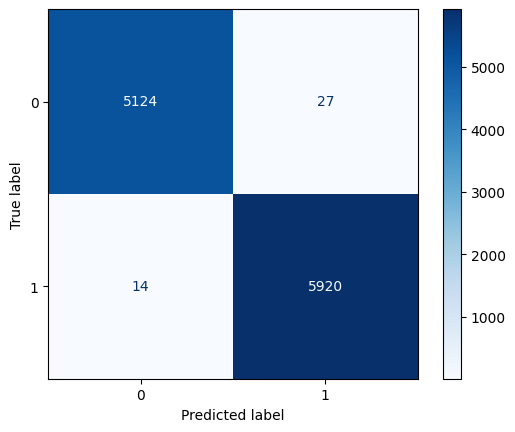








The total testing data is:  11085


In [54]:
# Predict class labels for test set
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# Get the predicted labels of the model on the test set
y_pred = models[2].predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Set the title of the display
#disp.ax_.set_title('Confusion matrix')

# Set the color map of the display
disp.plot(cmap=plt.cm.Blues)
plt.show()


print("\n\n\n\n\n\n\nThe total testing data is: ", len(y_pred))

# Performance Summary: Confusion Matrix Results for *Model [2] Random Forest Classifier* on Test Data


* True Positives (TP): The model correctly classified 5124 samples as positive (anomaly in this case).
* False Positives (FP): The model incorrectly classified 27 samples as positive (anomaly) when they were actually negative (normal).
* False Negatives (FN): The model incorrectly classified 14 samples as negative (normal) when they were actually positive (anomaly).
* True Negatives (TN): The model correctly classified 5920 samples as negative (normal).

These findings provide insights into the performance of the selected model on the test data. It correctly identified a substantial number of anomalies (TP) and normal samples (TN). However, it had a small number of false positives (FP) and false negatives (FN), indicating some misclassifications.

------------------------------------------------------------------------

Feature Selection for the Test Data in the test_data.csv

As the submission on kaggle was not available, the following the the selected model's selection prediction on this unseen data.

The only problem is this data does not contain the 'class' column so i can cross validate the predictions of our model.

In [45]:
#The feature names should match those that were passed during fit.

to_drop.pop(-1)
#to_drop

# droping the columns from the test data set
final_test_df = final_test_df.drop(to_drop, axis=1)
#to_drop
print(X_train.columns)
print(final_test_df.columns)
#final_test_df = final_test_df.drop(['flag', 'dst_host_srv_rerror_rate'], axis=1)


Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'num_file_creations', 'num_shells', 'num_access_files',
       'count', 'srv_count', 'serror_rate', 'rerror_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'protocol_type', 'service'],
      dtype='object')
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'num_file_creations', 'num_shells', 'num_access_files',
       'count', 'srv_count', 'serror_rate', 'rerror_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'protocol_type', 'service'],
      dtype='object'

In [46]:
# PREDICTING FOR TEST DATA using all 5 models
# Get the predicted labels from the models
pred_logReg = models[0].predict(final_test_df)
pred_decisionTree = models[1].predict(final_test_df)
pred_randomForest = models[2].predict(final_test_df)
pred_KNNClassifier = models[3].predict(final_test_df)
pred_GNBClassifier = models[4].predict(final_test_df)

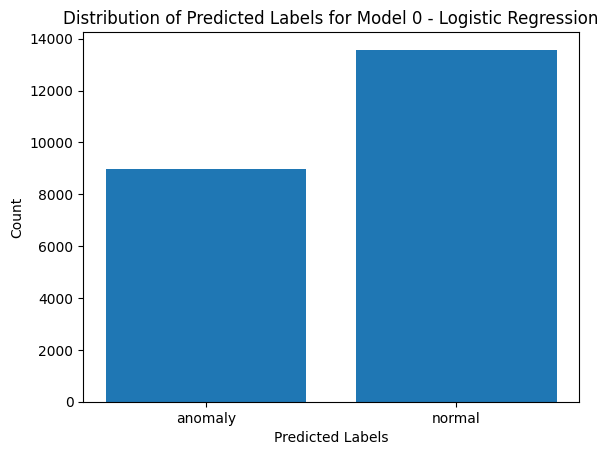

In [47]:
# Visualizeing the prediciton of logistic Regresion

# Create a bar chart to show the distribution of predicted labels
unique_labels, label_counts = np.unique(pred_logReg, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels for Model 0 - Logistic Regression')
plt.show()

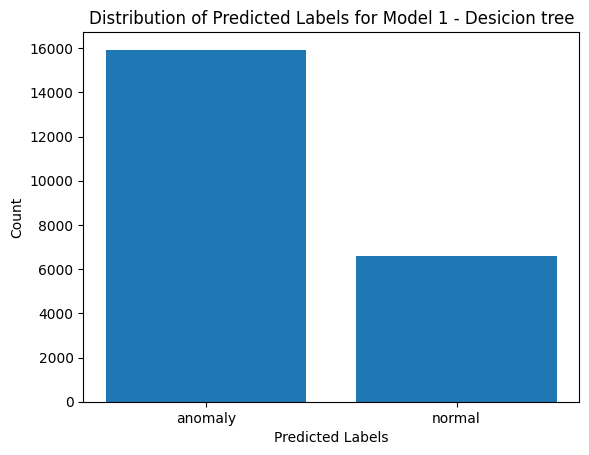

In [48]:
# Visualizeing the prediciton of Desicion tree

# Create a bar chart to show the distribution of predicted labels
unique_labels, label_counts = np.unique(pred_decisionTree, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels for Model 1 - Desicion tree')
plt.show()

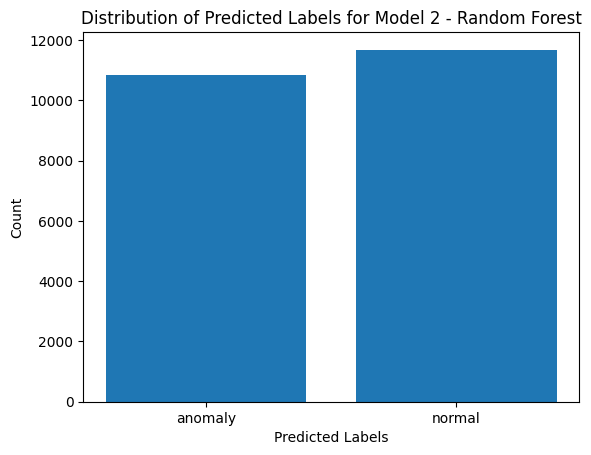

In [49]:
# Visualizeing the prediciton of Random Forest

# Create a bar chart to show the distribution of predicted labels
unique_labels, label_counts = np.unique(pred_randomForest, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels for Model 2 - Random Forest')
plt.show()

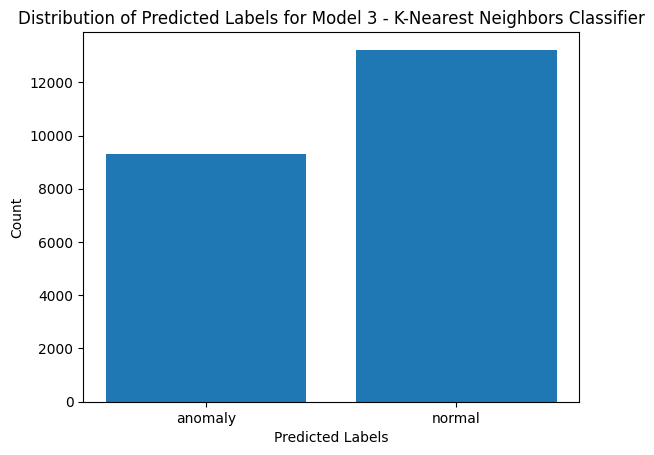

In [50]:
# Visualizeing the prediciton of KNN Classifier

# Create a bar chart to show the distribution of predicted labels
unique_labels, label_counts = np.unique(pred_KNNClassifier, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels for Model 3 - K-Nearest Neighbors Classifier')
plt.show()

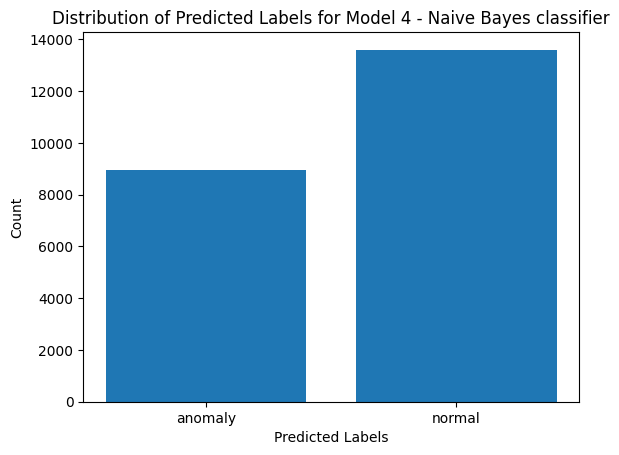

In [51]:
# Visualizeing the prediciton of GNB Classifier

# Create a bar chart to show the distribution of predicted labels
unique_labels, label_counts = np.unique(pred_GNBClassifier, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xticks(unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels for Model 4 - Naive Bayes classifier')
plt.show()

Save the trained machine learning model to a file using the pickle library, so that you can load it later and use it to make predictions.

In [56]:
import pickle

# Train your machine learning model here
model = models[2]

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [57]:
# Load the saved model from file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Use the model to make predictions
predictions = model.predict(final_test_df)
print(predictions)

['anomaly' 'anomaly' 'normal' ... 'normal' 'normal' 'anomaly']
